# Entrenamiento de modelo con TensorFlow Keras

Este notebook adapta el contenido de `main.py` a celdas de Jupyter interactivas.

##### Instalación de dependencias 
%pip install tensorflow-macos tensorflow-metal pandas numpy scikit-learn matplotlib

## 1. Imports y carga de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score

# Carga de datos
df = pd.read_csv('data/campaign_history.csv')
df.head()

,customer_id,recency,frequency,monetary,open_rate,ctr,age,gender,region,label
0,C001,103,49,575.90,0.69,0.92,29,Other,North,0
1,C002,349,28,287.18,0.07,0.49,34,F,West,0
2,C003,271,32,771.80,0.30,0.61,56,Other,North,1
3,C004,107,27,195.17,0.71,0.76,26,Other,North,0
4,C005,72,20,330.44,0.07,0.17,52,Other,East,1


## 2. Construcción del preprocesador

In [9]:
# Definir preprocesador
num_features = ['recency', 'frequency', 'monetary', 'open_rate', 'ctr', 'age']
cat_features = ['gender', 'region']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])

# Aplicar preprocesamiento
X = df.drop(columns=['customer_id', 'label'])
y = df['label'].values
X_proc = preprocessor.fit_transform(X)
X_proc.shape

(500, 13)

## 3. Construcción del modelo

In [10]:
# Definir arquitectura del modelo
def build_model(input_dim, lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

model = build_model(X_proc.shape[1], lr=1e-3)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Entrenamiento

In [5]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X_proc, y, test_size=0.2, random_state=42)

# Entrenar
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4811 - auc: 0.5235 - loss: 0.7413 - val_accuracy: 0.6700 - val_auc: 0.5687 - val_loss: 0.6354
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5712 - auc: 0.4837 - loss: 0.6928 - val_accuracy: 0.7300 - val_auc: 0.5589 - val_loss: 0.5905
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6615 - auc: 0.5582 - loss: 0.6462 - val_accuracy: 0.7300 - val_auc: 0.5510 - val_loss: 0.5865
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6475 - auc: 0.5600 - loss: 0.6353 - val_accuracy: 0.7300 - val_auc: 0.5502 - val_loss: 0.5871
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6636 - auc: 0.5518 - loss: 0.6293 - val_accuracy: 0.7300 - val_auc: 0.5350 - val_loss: 0.5900
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6397 - auc: 0.5387 - loss: 0.6506 - val_accuracy: 0.7300 - val_auc: 0.5358 - val_loss: 0.5948
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

## 5. Curvas de entrenamiento

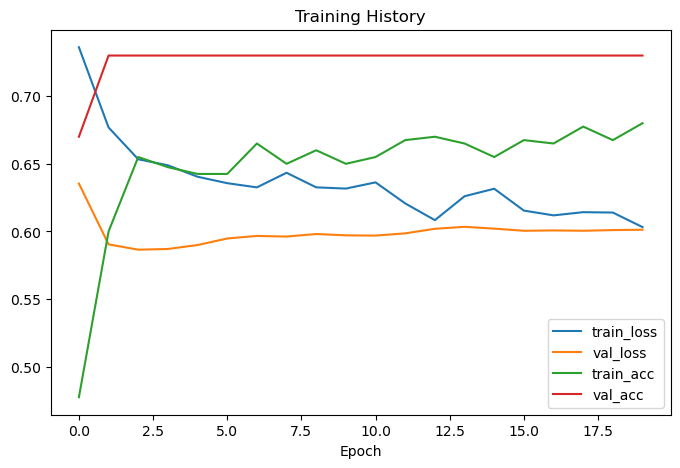

In [6]:
# Plot de historial
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training History')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 6. Evaluación

In [7]:
# Evaluación final
y_proba = model.predict(X_test).ravel()
y_pred = (y_proba >= 0.5).astype(int)

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df['roc_auc'] = ''
report_df.loc['1', 'roc_auc'] = roc_auc_score(y_test, y_proba)
report_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support,roc_auc
0,0.7300,1.00,0.843931,73.00,
1,0.0000,0.00,0.000000,27.00,0.516489
accuracy,0.7300,0.73,0.730000,0.73,
macro avg,0.3650,0.50,0.421965,100.00,
weighted avg,0.5329,0.73,0.616069,100.00,


## 7. Guardar modelo y métricas

In [11]:
# Guardar modelo y métricas
model.save('models/keras_campaign_model.keras')
report_df.to_csv('outputs/metrics_keras.csv', index=True)